In [1]:
import pickle
with open("../2_p4_c5_GMX/10_contact/con_results.pkl", "rb") as C5_resultsFile:
    C5_results = pickle.load(C5_resultsFile)
C5_results = C5_results.iloc[:, :-1]
C5_results = C5_results.T
C5_results["Mean"] = C5_results.mean(axis=1)
C5_results = C5_results.reset_index()[["index", "Mean"]]
C5_results.columns = ["ResiduesNdx", "Distence_C5"]
#C5_results.info()

with open("../3_p4_rna_GMX/10_contact/con_results.pkl", "rb") as RNA_resultsFile:
    RNA_results = pickle.load(RNA_resultsFile)
RNA_results = RNA_results.iloc[:, :-1]
RNA_results = RNA_results.T
RNA_results["Mean"] = RNA_results.mean(axis=1)
RNA_results = RNA_results.reset_index()[["index", "Mean"]]
RNA_results.columns = ["ResiduesNdx", "Distence_RNA"]
RNA_results.info()

with open("../4_2p4_2dna_GMX/10_contact/con_results.pkl", "rb") as ssDNA_resultsFile:
    ssDNA_results = pickle.load(ssDNA_resultsFile)
ssDNA_results = ssDNA_results.iloc[:, :-1]
ssDNA_results = ssDNA_results.T
ssDNA_results["Mean"] = ssDNA_results.mean(axis=1)
ssDNA_results = ssDNA_results.reset_index()[["index", "Mean"]]
ssDNA_results.columns = ["ResiduesNdx", "Distence_ssDNA"]
ssDNA_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ResiduesNdx   179 non-null    int64  
 1   Distence_RNA  179 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ResiduesNdx     179 non-null    int64  
 1   Distence_ssDNA  179 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.9 KB


In [2]:
import pandas as pd

C5_Eng = pd.read_excel('C5.dec.xlsx', usecols=[0, 16])
C5_Eng.columns = ["Residues_C5", "MeanEnergy_C5"]
C5_Eng["ResiduesNdx"] = C5_Eng["Residues_C5"].apply(lambda x: x.split(":")[-1])
C5_Eng = C5_Eng.loc[:186,:]
C5_Eng["ResiduesNdx"] = C5_Eng["ResiduesNdx"].astype("int64")
#C5_Eng.info()

RNA_Eng = pd.read_excel('RNA.dec.xlsx', usecols=[0, 16])
RNA_Eng.columns = ["Residues_RNA", "MeanEnergy_RNA"]
RNA_Eng["ResiduesNdx"] = RNA_Eng["Residues_RNA"].apply(lambda x: x.split(":")[-1])
RNA_Eng = RNA_Eng.loc[:26,:]
RNA_Eng["ResiduesNdx"] = RNA_Eng["ResiduesNdx"].astype("int64")
#RNA_Eng.info()

ssDNA_Eng = pd.read_excel('ssDNA.dec.xlsx', usecols=[0, 16])
ssDNA_Eng.columns = ["Residues_ssDNA", "MeanEnergy_ssDNA"]
ssDNA_Eng["ResiduesNdx"] = ssDNA_Eng["Residues_ssDNA"].apply(lambda x: x.split(":")[-1])
ssDNA_Eng = ssDNA_Eng.loc[:33,:]
ssDNA_Eng["ResiduesNdx"] = ssDNA_Eng["ResiduesNdx"].astype("int64")
#ssDNA_Eng.info()

In [3]:
RNA_Eng.head()

,Residues_RNA,MeanEnergy_RNA,ResiduesNdx
0,R:A:GLU:18,2.345768,18
1,R:A:GLN:19,-0.894203,19
2,R:A:LYS:22,-4.177744,22
3,R:A:PHE:24,-3.735902,24
4,R:A:GLY:26,-0.265092,26


In [4]:
mergeData = pd.merge(
    RNA_Eng[["MeanEnergy_RNA", "ResiduesNdx"]],
    C5_Eng[["MeanEnergy_C5", "ResiduesNdx"]],
    on = "ResiduesNdx", how = "outer"
)
mergeData = pd.merge(
    ssDNA_Eng[["MeanEnergy_ssDNA", "ResiduesNdx"]],
    mergeData,
    on = "ResiduesNdx", how = "outer"
)
mergeData = pd.merge(
    C5_results,
    mergeData,
    on = "ResiduesNdx", how = "inner"
)
mergeData = pd.merge(
    RNA_results,
    mergeData,
    on = "ResiduesNdx", how = "inner"
)
mergeData = pd.merge(
    ssDNA_results,
    mergeData,
    on = "ResiduesNdx", how = "inner"
)
mergeData.fillna(0, inplace = True)

In [5]:
mergeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ResiduesNdx       39 non-null     int64  
 1   Distence_ssDNA    39 non-null     float64
 2   Distence_RNA      39 non-null     float64
 3   Distence_C5       39 non-null     float64
 4   MeanEnergy_ssDNA  39 non-null     float64
 5   MeanEnergy_RNA    39 non-null     float64
 6   MeanEnergy_C5     39 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 2.3 KB


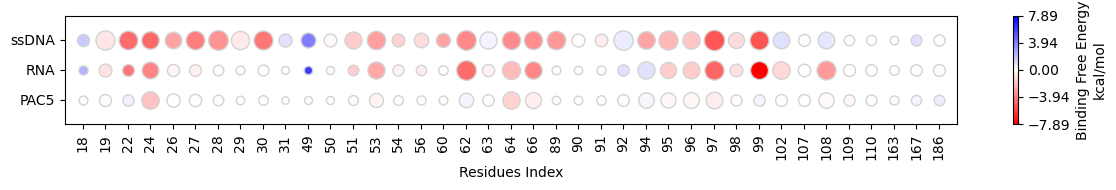

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import FixedLocator, FuncFormatter
df = mergeData
# 计算点的大小，这里我们用距离的倒数来表示大小，并乘以一个放大因子
size_scale = 400  # 放大因子，可以根据需要调整
df['Distence_C5'] = (1 / df['Distence_C5']) * size_scale
df['Distence_RNA'] = (1 / df['Distence_RNA']) * size_scale
df['Distence_ssDNA'] = (1 / df['Distence_ssDNA']) * size_scale

# 创建画布，减小高度
fig, ax = plt.subplots(figsize=(12, 2))

# 设置y轴的位置
y_positions = {'C5': 0, 'RNA': 0.5, 'ssDNA' : 1}

# 将proNdx转换为分类变量
df['ResiduesNdx'] = df['ResiduesNdx'].astype(str)

# 获取唯一的proNdx值，用于x轴标签
unique_proNdx = df['ResiduesNdx'].unique()

# 自定义颜色映射，负值为红色，正值为蓝色
cmap = LinearSegmentedColormap.from_list('custom', ['red', 'white', 'blue'], N=256)

# 计算颜色映射的范围，确保0点对称
max_eng = max(df['MeanEnergy_C5'].abs().max(), df['MeanEnergy_RNA'].abs().max(), df['MeanEnergy_ssDNA'].abs().max())

# 绘制PAC5点
for index, row in df.iterrows():
    ax.scatter(unique_proNdx.tolist().index(row['ResiduesNdx']), y_positions['C5'], s=row['Distence_C5'], c=row['MeanEnergy_C5'], cmap=cmap, vmin=-max_eng, vmax=max_eng, edgecolors='lightgray')

# 绘制RNA点
for index, row in df.iterrows():
    ax.scatter(unique_proNdx.tolist().index(row['ResiduesNdx']), y_positions['RNA'], s=row['Distence_RNA'], c=row['MeanEnergy_RNA'], cmap=cmap, vmin=-max_eng, vmax=max_eng, edgecolors='lightgray')

# 绘制ssDNA点
for index, row in df.iterrows():
    ax.scatter(unique_proNdx.tolist().index(row['ResiduesNdx']), y_positions['ssDNA'], s=row['Distence_ssDNA'], c=row['MeanEnergy_ssDNA'], cmap=cmap, vmin=-max_eng, vmax=max_eng, edgecolors='lightgray')

# 设置图例
ax.set_xlabel('Residues Index')
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels(['PAC5', 'RNA', 'ssDNA'])
#ax.set_title('Dotplot of RNA and ssDNA')

# 设置x轴刻度
ax.set_xticks(range(len(unique_proNdx)))
ax.set_xticklabels(unique_proNdx, rotation=90)#, ha='right')  # 旋转标签以提高可读性

# 设置y轴范围，增加一些空间以避免点被裁剪
y_margin = 0.4  # y轴边缘的额外空间
ax.set_ylim(-y_margin, 1 + y_margin)

x_margin = 0.8  # y轴边缘的额外空间
ax.set_xlim(-x_margin, 38 + x_margin)

# 添加颜色条
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(-max_eng, max_eng)), ax=ax)
cbar.set_label('Binding Free Energy\nkcal/mol')

# 设置颜色条的刻度
tick_locator = FixedLocator([-max_eng, -max_eng/2, 0, max_eng/2, max_eng])
cbar.ax.yaxis.set_major_locator(tick_locator)
#cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{x:.2f}"))

# 显示图形
plt.tight_layout()  # 调整布局以适应刻度标签

# 保存图像
plt.savefig('./dotplot.png', dpi=300, bbox_inches='tight')  # 保存为PNG格式，300 DPI，自动调整布局
plt.savefig('./dotplot.svg', bbox_inches='tight')  # 保存为PNG格式，300 DPI，自动调整布局
plt.show()


